# Performances of matrix multiplication on tapered fat trees

In [1]:
library(ggplot2)

plot_results <- function(global_results, local_results, comment){

    communication_times <- local_results[,c("nb_root_switches", "communication_time")]
    colnames(communication_times) <- c("nb_root_switches", "time")
    communication_times$group <- "communication"
    computation_times <- local_results[,c("nb_root_switches", "computation_time")]
    colnames(computation_times) <- c("nb_root_switches", "time")
    computation_times$group <- "computation"
    global_times <- global_results[,c("nb_root_switches", "time")]
    global_times$group <- "total"

    all_times = rbind(communication_times, computation_times, global_times)
    
    title <- paste("Time to perform a matrix product on tapered fat trees\n", comment)
    return(ggplot(all_times, aes(x=nb_root_switches, y=time, group=group, col=group, fill=group))+
        stat_summary(geom="line", fun.y=mean)+
        stat_summary(fun.data = mean_sdl, geom = "errorbar")+
   #     stat_summary(geom="point", fun.y=mean)+
        expand_limits(x=0, y=0)+
        ggtitle(title)
    )
}

We compute a matrix product.

The topology is a 2-level fat-tree made with 48 port switches, where we remove some of the root switches.
In other word, we use fat-trees (2;24,48;1,n;1,1) for n in [1, 24].

The goal with such an experiment is to see if we can make some economies (by removing switches) without losing in performances. This is a similar idea to what was done in the paper “Characterizing Parallel Scientific Applicatioon Commodity Clusters: An Empirical Study of a Tapered Fat-Tre”.

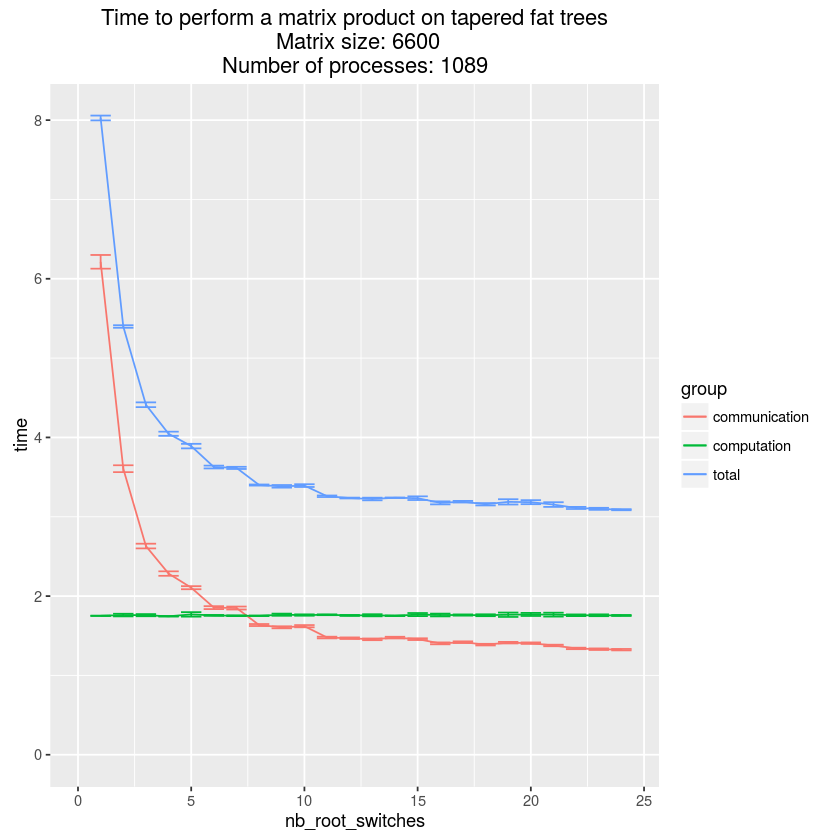

In [2]:
local_results <- read.csv("local_1089procs.csv")
global_results <- read.csv("global_1089procs.csv")
plot_results(global_results, local_results, "Matrix size: 6600\nNumber of processes: 1089")

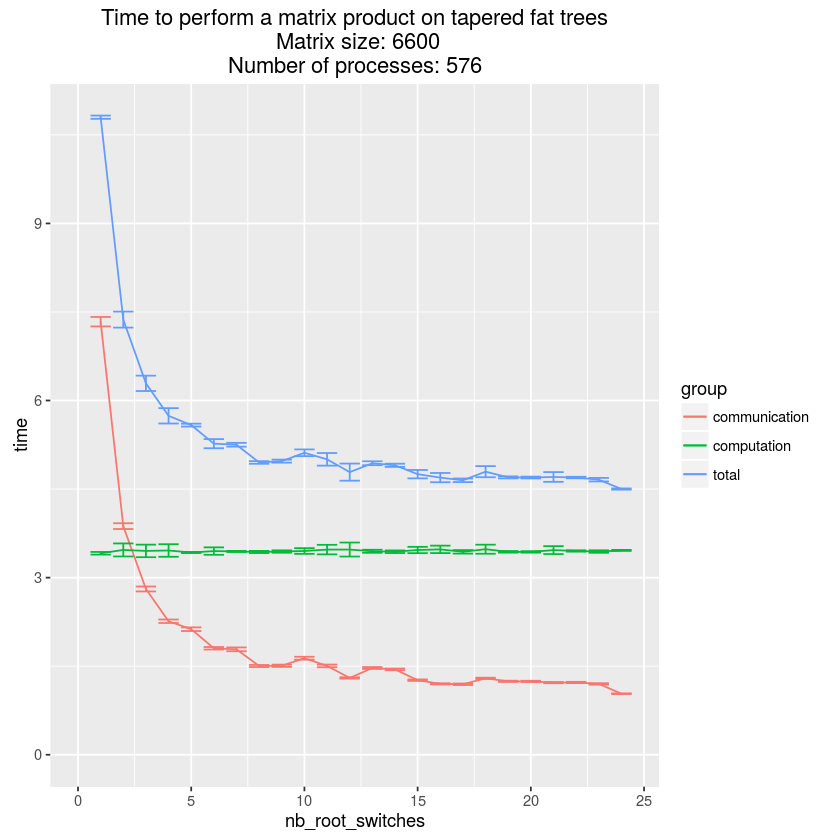

In [3]:
local_results <- read.csv("local_576procs.csv")
global_results <- read.csv("global_576procs.csv")
plot_results(global_results, local_results, "Matrix size: 6600\nNumber of processes: 576")